#**Data**

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from PIL import Image
Image = Image.open("/content/image_PCA.png").convert('L')


In [19]:
X = np.array(Image)

In [20]:
X.shape

(400, 760)

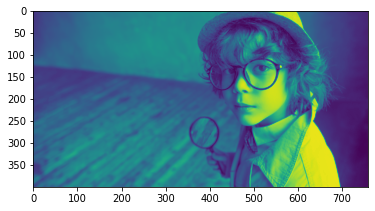

In [21]:
plt.imshow(X)

In [22]:
X_meaned = X - np.mean(X , axis = 0)
print (X_meaned)

[[-24.5125 -23.495  -22.54   ...  10.1825  10.455    9.7075]
 [-23.5125 -23.495  -22.54   ...  10.1825   9.455    9.7075]
 [-23.5125 -23.495  -22.54   ...  10.1825  10.455   10.7075]
 ...
 [  2.4875  -0.495   -3.54   ...  -5.8175  -5.545   -5.2925]
 [ -0.5125  -1.495   -5.54   ...  -5.8175  -6.545   -5.2925]
 [ -2.5125  -4.495   -6.54   ...  -6.8175  -6.545   -6.2925]]


In [23]:
print(X.shape)
print (X_meaned.shape)

(400, 760)
(400, 760)


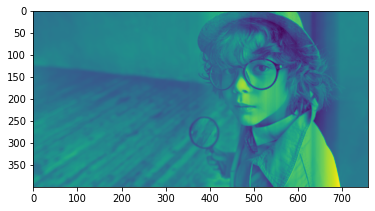

In [24]:
plt.imshow(X_meaned)

In [25]:
cov_mat = np.cov(X_meaned , rowvar = False)   # rowvar = False >> work with X_meaned as transposed

In [26]:
print (cov_mat.shape)
print (cov_mat)

(760, 760)
[[296.37077068 292.4023183  287.08345865 ... -76.36989348 -75.42788221
  -74.47108396]
 [292.4023183  290.40097744 286.75709273 ... -78.32046366 -77.3381203
  -76.32309524]
 [287.08345865 286.75709273 285.46706767 ... -79.57538847 -78.55819549
  -77.49418546]
 ...
 [-76.36989348 -78.32046366 -79.57538847 ...  56.12450501  55.66612782
   55.10364035]
 [-75.42788221 -77.3381203  -78.55819549 ...  55.66612782  55.55686717
   54.94294486]
 [-74.47108396 -76.32309524 -77.49418546 ...  55.10364035  54.94294486
   54.74380326]]


In [27]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [28]:
print (eigen_vectors.shape)
print (eigen_values)

(760, 760)
[-3.39800135e-11 -2.77687189e-11 -2.06261937e-11 -1.79301200e-11
 -1.51561729e-11 -1.47005677e-11 -1.38135702e-11 -1.27300507e-11
 -1.11516964e-11 -1.10943745e-11 -1.10467957e-11 -1.05527230e-11
 -1.04997484e-11 -9.93594070e-12 -9.31002491e-12 -8.89983748e-12
 -8.52560050e-12 -8.20730549e-12 -7.93319138e-12 -7.26377028e-12
 -7.25521970e-12 -7.25111588e-12 -7.02012650e-12 -6.90983057e-12
 -6.78598877e-12 -6.37646551e-12 -6.35908377e-12 -5.81274691e-12
 -5.65619501e-12 -5.51311958e-12 -5.50766356e-12 -5.50462847e-12
 -5.13784356e-12 -4.98024242e-12 -4.84571659e-12 -4.81882260e-12
 -4.68520544e-12 -4.65087421e-12 -4.45715066e-12 -4.37117266e-12
 -4.36613351e-12 -4.35064593e-12 -4.31531579e-12 -4.18014002e-12
 -4.17689330e-12 -4.02757250e-12 -3.95650529e-12 -3.86089794e-12
 -3.80657576e-12 -3.72846105e-12 -3.71765384e-12 -3.49739667e-12
 -3.47126841e-12 -3.31027522e-12 -3.22169099e-12 -3.20897027e-12
 -3.14856598e-12 -3.09120654e-12 -2.95264505e-12 -2.87925503e-12
 -2.86311702e-

In [29]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print (sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

[759 758 757 756 755 754 753 752 751 750 749 748 747 746 745 744 743 742
 741 740 739 738 737 736 735 734 733 732 731 730 729 728 727 726 725 724
 723 722 721 720 719 718 717 716 715 714 713 712 711 710 709 708 707 706
 705 704 703 702 701 700 699 698 697 696 695 694 693 692 691 690 689 688
 687 686 685 684 683 682 681 680 679 678 677 676 675 674 673 672 671 670
 669 668 667 666 665 664 663 662 661 660 659 658 657 656 655 654 653 652
 651 650 649 648 647 646 645 644 643 642 641 640 639 638 637 636 635 634
 633 632 631 630 629 628 627 626 625 624 623 622 621 620 619 618 617 616
 615 614 613 612 611 610 609 608 607 606 605 604 603 602 601 600 599 598
 597 596 595 594 593 592 591 590 589 588 587 586 585 584 583 582 581 580
 579 578 577 576 575 574 573 572 571 570 569 568 567 566 565 564 563 562
 561 560 559 558 557 556 555 554 553 552 551 550 549 548 547 546 545 544
 543 542 541 540 539 538 537 536 535 534 533 532 531 530 529 528 527 526
 525 524 523 522 521 520 519 518 517 516 515 514 51

#**Encoding (20)**

In [116]:
n_components = 20 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [117]:
print (sorted_eigenvectors)

[[ 1.15693193e-02 -9.33076965e-04  1.10426919e-02 ...  0.00000000e+00
   0.00000000e+00 -2.09337745e-05]
 [ 1.18264012e-02 -1.57065700e-03  1.15915193e-02 ...  6.80112646e-02
   4.26785571e-02  4.66166062e-01]
 [ 1.19693606e-02 -2.07551469e-03  1.20717910e-02 ... -1.38567607e-01
  -1.57729723e-01 -2.09199853e-01]
 ...
 [-7.52499345e-03  6.26081670e-03 -2.55051680e-03 ... -4.93038748e-02
   3.08901565e-02 -3.60069892e-03]
 [-7.41903262e-03  6.26381406e-03 -2.48933213e-03 ...  1.90248012e-02
  -1.72958572e-02  4.37354958e-02]
 [-7.32314380e-03  6.14867315e-03 -2.31022896e-03 ... -1.72181161e-02
  -3.31677539e-02  2.77949116e-02]]


In [118]:
print (eigenvector_subset)

[[ 0.01156932 -0.00093308  0.01104269 ... -0.03225357  0.00094098
  -0.0224477 ]
 [ 0.0118264  -0.00157066  0.01159152 ... -0.03126017  0.0004892
  -0.02225343]
 [ 0.01196936 -0.00207551  0.01207179 ... -0.02903366 -0.00172827
  -0.02138304]
 ...
 [-0.00752499  0.00626082 -0.00255052 ...  0.00053122 -0.00537177
  -0.00205185]
 [-0.00741903  0.00626381 -0.00248933 ...  0.00143828 -0.00561471
  -0.00159657]
 [-0.00732314  0.00614867 -0.00231023 ...  0.00283793 -0.00540035
  -0.00240865]]


In [119]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)

[[-1.55701479e+02 -2.54222032e+02  4.35939974e+02 ... -4.85438894e+01
  -3.54437169e+01  2.24927487e+01]
 [-1.22235137e+02 -1.65460761e+02  4.44704789e+02 ... -3.67121980e+01
  -2.90714846e+01  4.31425467e+00]
 [-9.42822593e+01 -8.48573330e+01  4.58881014e+02 ... -2.48921227e+01
  -5.27712514e+01  2.70189660e+00]
 ...
 [ 1.22074041e+03 -1.16452933e+01 -2.08100348e+02 ...  2.91228389e+01
   1.81817115e+01 -6.14392344e+01]
 [ 1.22198794e+03 -8.32598576e+00 -1.94774289e+02 ...  3.47236857e+01
   8.29441915e+00 -6.69587886e+01]
 [ 1.22263224e+03 -3.19235746e+00 -1.83301031e+02 ...  3.85060741e+01
   1.15925731e+00 -6.88488949e+01]]


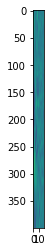

In [120]:
plt.imshow(X_reduced)

In [121]:
print(np.dot(np.linalg.inv(np.dot(eigenvector_subset.T, eigenvector_subset)),eigenvector_subset.T).shape)
print(X_reduced.shape)
print(X_meaned.shape)

(20, 760)
(400, 20)
(400, 760)


**Restore The Image**

In [122]:
eigenvector_subset_inverse = np.dot(np.linalg.inv(np.dot(eigenvector_subset.T, eigenvector_subset)),eigenvector_subset.T)
img_meaned = np.dot(X_reduced, eigenvector_subset_inverse)

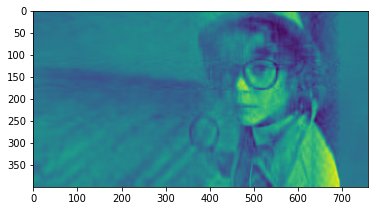

In [123]:
plt.imshow(img_meaned)

In [124]:
img = img_meaned + np.mean(X , axis = 0)


Text(0.5, 1.0, 'Original')

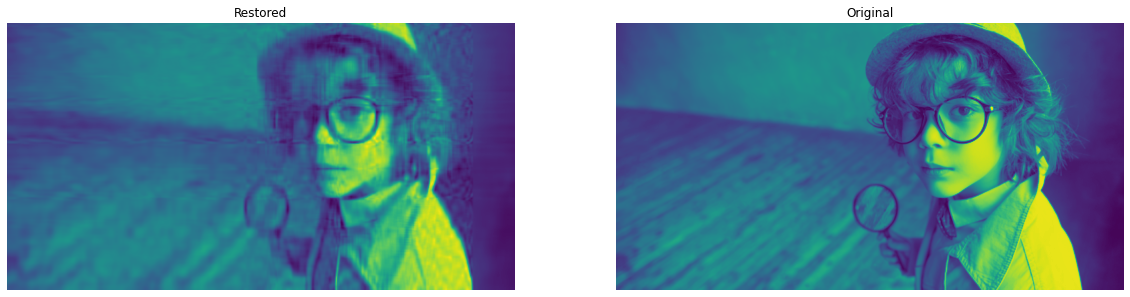

In [125]:
fig = plt.figure(figsize=(20, 15))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img)
plt.axis('off')
plt.title("Restored")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(X)
plt.axis('off')
plt.title("Original")


**Compression ratio / Sum of eigenvalues**

In [126]:
compression_ratio = (X.shape[0]*X.shape[1] - (X_reduced.shape[0]*X_reduced.shape[1] + eigenvector_subset.shape[0]*eigenvector_subset.shape[1])) / (X.shape[0]*X.shape[1]) 
print("Compression percentage: ", compression_ratio*100, sep="")
print("Sum of eigenvalues: ", eigen_values[:n_components].sum(), sep="")

Compression percentage: 92.36842105263158
Sum of eigenvalues: -2.7112641633428315e-10


#**Encoding (50)**

In [127]:
n_components = 50 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [128]:
print (sorted_eigenvectors)

[[ 1.15693193e-02 -9.33076965e-04  1.10426919e-02 ...  0.00000000e+00
   0.00000000e+00 -2.09337745e-05]
 [ 1.18264012e-02 -1.57065700e-03  1.15915193e-02 ...  6.80112646e-02
   4.26785571e-02  4.66166062e-01]
 [ 1.19693606e-02 -2.07551469e-03  1.20717910e-02 ... -1.38567607e-01
  -1.57729723e-01 -2.09199853e-01]
 ...
 [-7.52499345e-03  6.26081670e-03 -2.55051680e-03 ... -4.93038748e-02
   3.08901565e-02 -3.60069892e-03]
 [-7.41903262e-03  6.26381406e-03 -2.48933213e-03 ...  1.90248012e-02
  -1.72958572e-02  4.37354958e-02]
 [-7.32314380e-03  6.14867315e-03 -2.31022896e-03 ... -1.72181161e-02
  -3.31677539e-02  2.77949116e-02]]


In [129]:
print (eigenvector_subset)

[[ 0.01156932 -0.00093308  0.01104269 ...  0.01936861  0.01054777
   0.00143272]
 [ 0.0118264  -0.00157066  0.01159152 ...  0.01717358  0.01317574
  -0.00129476]
 [ 0.01196936 -0.00207551  0.01207179 ...  0.01466202  0.01147535
  -0.00083837]
 ...
 [-0.00752499  0.00626082 -0.00255052 ...  0.0062721  -0.00084482
  -0.01077847]
 [-0.00741903  0.00626381 -0.00248933 ...  0.00709293  0.0002114
  -0.01297261]
 [-0.00732314  0.00614867 -0.00231023 ...  0.0062179  -0.00077418
  -0.0124664 ]]


In [130]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)

[[-1.55701479e+02 -2.54222032e+02  4.35939974e+02 ... -8.02119749e-02
  -5.64383594e+01 -4.04789945e+01]
 [-1.22235137e+02 -1.65460761e+02  4.44704789e+02 ... -1.37429896e+01
   8.74717066e+00 -1.64831527e+01]
 [-9.42822593e+01 -8.48573330e+01  4.58881014e+02 ... -2.81569379e+01
  -7.19054429e+00 -4.90818230e+00]
 ...
 [ 1.22074041e+03 -1.16452933e+01 -2.08100348e+02 ... -3.88755566e+01
  -7.41825900e+00 -3.40923477e+00]
 [ 1.22198794e+03 -8.32598576e+00 -1.94774289e+02 ... -4.88526451e+01
   6.76409972e+00 -8.76715656e+00]
 [ 1.22263224e+03 -3.19235746e+00 -1.83301031e+02 ... -5.30999395e+01
   1.45696693e+01 -1.41696552e+01]]


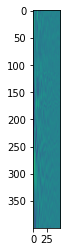

In [131]:
plt.imshow(X_reduced)

In [132]:
print(np.dot(np.linalg.inv(np.dot(eigenvector_subset.T, eigenvector_subset)),eigenvector_subset.T).shape)
print(X_reduced.shape)
print(X_meaned.shape)

(50, 760)
(400, 50)
(400, 760)


**Restore The Image**

In [133]:
eigenvector_subset_inverse = np.dot(np.linalg.inv(np.dot(eigenvector_subset.T, eigenvector_subset)),eigenvector_subset.T)
img_meaned = np.dot(X_reduced, eigenvector_subset_inverse)

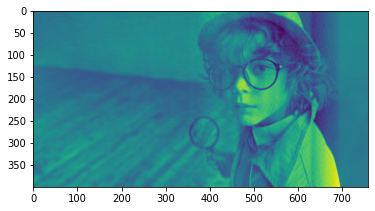

In [134]:
plt.imshow(img_meaned)

In [135]:
img = img_meaned + np.mean(X , axis = 0)


Text(0.5, 1.0, 'Original')

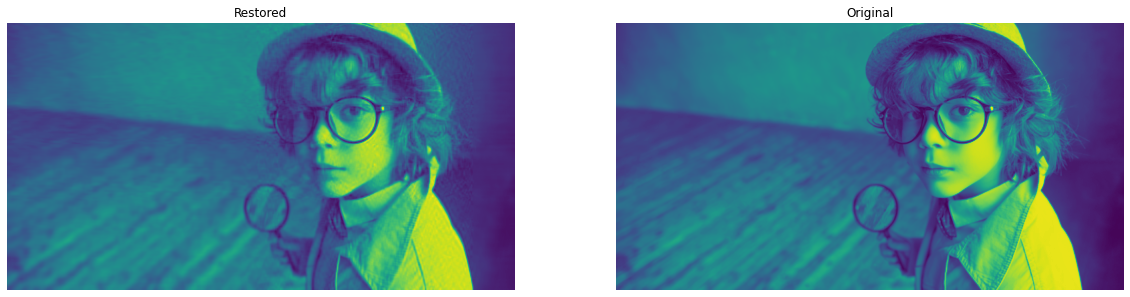

In [136]:
fig = plt.figure(figsize=(20, 12))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img)
plt.axis('off')
plt.title("Restored")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(X)
plt.axis('off')
plt.title("Original")


**Compression ratio / Sum of eigenvalues**

In [137]:
compression_ratio = (X.shape[0]*X.shape[1] - (X_reduced.shape[0]*X_reduced.shape[1] + eigenvector_subset.shape[0]*eigenvector_subset.shape[1])) / (X.shape[0]*X.shape[1]) 
print("Compression percentage: ", compression_ratio*100, sep="")
print("Sum of eigenvalues: ", eigen_values[:n_components].sum(), sep="")

Compression percentage: 80.92105263157895
Sum of eigenvalues: -4.25794769809563e-10


#**Encoding (100)**

In [138]:
n_components = 100 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [139]:
print (sorted_eigenvectors)

[[ 1.15693193e-02 -9.33076965e-04  1.10426919e-02 ...  0.00000000e+00
   0.00000000e+00 -2.09337745e-05]
 [ 1.18264012e-02 -1.57065700e-03  1.15915193e-02 ...  6.80112646e-02
   4.26785571e-02  4.66166062e-01]
 [ 1.19693606e-02 -2.07551469e-03  1.20717910e-02 ... -1.38567607e-01
  -1.57729723e-01 -2.09199853e-01]
 ...
 [-7.52499345e-03  6.26081670e-03 -2.55051680e-03 ... -4.93038748e-02
   3.08901565e-02 -3.60069892e-03]
 [-7.41903262e-03  6.26381406e-03 -2.48933213e-03 ...  1.90248012e-02
  -1.72958572e-02  4.37354958e-02]
 [-7.32314380e-03  6.14867315e-03 -2.31022896e-03 ... -1.72181161e-02
  -3.31677539e-02  2.77949116e-02]]


In [140]:
print (eigenvector_subset)

[[ 0.01156932 -0.00093308  0.01104269 ...  0.0185693  -0.01205219
  -0.00263704]
 [ 0.0118264  -0.00157066  0.01159152 ...  0.02429879 -0.01419328
  -0.01202958]
 [ 0.01196936 -0.00207551  0.01207179 ...  0.02595025 -0.00826302
  -0.01163087]
 ...
 [-0.00752499  0.00626082 -0.00255052 ...  0.00390514  0.00605217
  -0.00641321]
 [-0.00741903  0.00626381 -0.00248933 ...  0.00559311  0.0061866
  -0.00794776]
 [-0.00732314  0.00614867 -0.00231023 ...  0.01057965  0.00664432
  -0.00570844]]


In [141]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)

[[-1.55701479e+02 -2.54222032e+02  4.35939974e+02 ... -7.12820152e+00
   1.02645141e+01  3.48475104e+00]
 [-1.22235137e+02 -1.65460761e+02  4.44704789e+02 ... -7.71491019e-01
   1.92095762e+01  1.00167346e+01]
 [-9.42822593e+01 -8.48573330e+01  4.58881014e+02 ...  1.38687378e+01
  -4.07496213e+00 -1.25269093e+01]
 ...
 [ 1.22074041e+03 -1.16452933e+01 -2.08100348e+02 ...  8.27379481e+00
  -9.13840205e+00 -5.74440363e+00]
 [ 1.22198794e+03 -8.32598576e+00 -1.94774289e+02 ...  4.02878313e-01
   1.29265211e+01  1.13053614e-01]
 [ 1.22263224e+03 -3.19235746e+00 -1.83301031e+02 ... -7.60852450e+00
   2.56086497e+01  6.70910058e+00]]


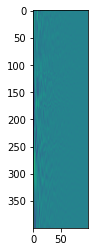

In [142]:
plt.imshow(X_reduced)

In [143]:
print(np.dot(np.linalg.inv(np.dot(eigenvector_subset.T, eigenvector_subset)),eigenvector_subset.T).shape)
print(X_reduced.shape)
print(X_meaned.shape)

(100, 760)
(400, 100)
(400, 760)


**Restore The Image**

In [144]:
eigenvector_subset_inverse = np.dot(np.linalg.inv(np.dot(eigenvector_subset.T, eigenvector_subset)),eigenvector_subset.T)
img_meaned = np.dot(X_reduced, eigenvector_subset_inverse)

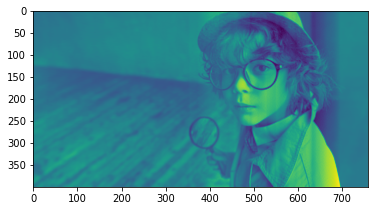

In [145]:
plt.imshow(img_meaned)

In [146]:
img = img_meaned + np.mean(X , axis = 0)


Text(0.5, 1.0, 'Original')

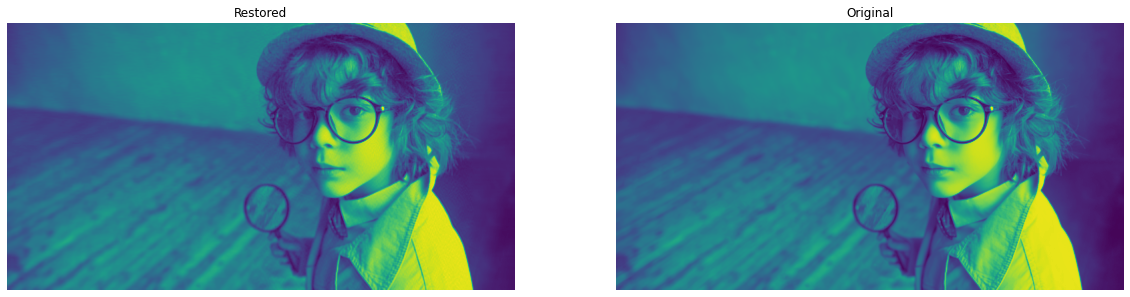

In [147]:
fig = plt.figure(figsize=(20, 12))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img)
plt.axis('off')
plt.title("Restored")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(X)
plt.axis('off')
plt.title("Original")


**Compression ratio / Sum of eigenvalues**

In [148]:
compression_ratio = (X.shape[0]*X.shape[1] - (X_reduced.shape[0]*X_reduced.shape[1] + eigenvector_subset.shape[0]*eigenvector_subset.shape[1])) / (X.shape[0]*X.shape[1]) 
print("Compression percentage: ", compression_ratio*100, sep="")
print("Sum of eigenvalues: ", eigen_values[:n_components].sum(), sep="")

Compression percentage: 61.8421052631579
Sum of eigenvalues: -5.465282105936611e-10


#**Encoding (150)**

In [149]:
n_components = 150 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [150]:
print (sorted_eigenvectors)

[[ 1.15693193e-02 -9.33076965e-04  1.10426919e-02 ...  0.00000000e+00
   0.00000000e+00 -2.09337745e-05]
 [ 1.18264012e-02 -1.57065700e-03  1.15915193e-02 ...  6.80112646e-02
   4.26785571e-02  4.66166062e-01]
 [ 1.19693606e-02 -2.07551469e-03  1.20717910e-02 ... -1.38567607e-01
  -1.57729723e-01 -2.09199853e-01]
 ...
 [-7.52499345e-03  6.26081670e-03 -2.55051680e-03 ... -4.93038748e-02
   3.08901565e-02 -3.60069892e-03]
 [-7.41903262e-03  6.26381406e-03 -2.48933213e-03 ...  1.90248012e-02
  -1.72958572e-02  4.37354958e-02]
 [-7.32314380e-03  6.14867315e-03 -2.31022896e-03 ... -1.72181161e-02
  -3.31677539e-02  2.77949116e-02]]


In [151]:
print (eigenvector_subset)

[[ 0.01156932 -0.00093308  0.01104269 ... -0.05128553  0.01293152
   0.00820664]
 [ 0.0118264  -0.00157066  0.01159152 ... -0.04471348  0.00848933
   0.01762142]
 [ 0.01196936 -0.00207551  0.01207179 ... -0.02259689  0.01498594
   0.02275892]
 ...
 [-0.00752499  0.00626082 -0.00255052 ... -0.00705623 -0.0024695
  -0.00108984]
 [-0.00741903  0.00626381 -0.00248933 ... -0.0107914   0.00587604
   0.0005946 ]
 [-0.00732314  0.00614867 -0.00231023 ... -0.01199094  0.00513478
   0.00325679]]


In [152]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)

[[-1.55701479e+02 -2.54222032e+02  4.35939974e+02 ...  1.56361808e+00
   3.22672538e+00  4.09254674e+00]
 [-1.22235137e+02 -1.65460761e+02  4.44704789e+02 ...  5.66235301e+00
  -2.23019984e+00 -6.72118523e-01]
 [-9.42822593e+01 -8.48573330e+01  4.58881014e+02 ...  1.00377973e+01
  -2.07941478e+00 -4.60746394e+00]
 ...
 [ 1.22074041e+03 -1.16452933e+01 -2.08100348e+02 ... -2.80107978e+00
  -4.22238660e+00  1.35584270e+00]
 [ 1.22198794e+03 -8.32598576e+00 -1.94774289e+02 ... -2.04226602e-01
  -4.03387782e-01  1.17141479e+00]
 [ 1.22263224e+03 -3.19235746e+00 -1.83301031e+02 ...  5.46572115e+00
   4.19717372e+00 -6.30080307e-01]]


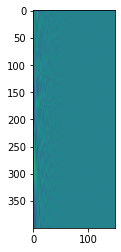

In [153]:
plt.imshow(X_reduced)

In [154]:
print(np.dot(np.linalg.inv(np.dot(eigenvector_subset.T, eigenvector_subset)),eigenvector_subset.T).shape)
print(X_reduced.shape)
print(X_meaned.shape)

(150, 760)
(400, 150)
(400, 760)


**Restore The Image**

In [155]:
eigenvector_subset_inverse = np.dot(np.linalg.inv(np.dot(eigenvector_subset.T, eigenvector_subset)),eigenvector_subset.T)
img_meaned = np.dot(X_reduced, eigenvector_subset_inverse)

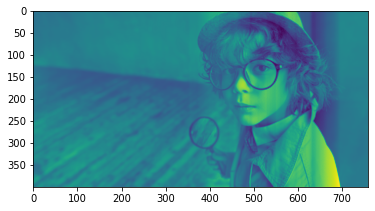

In [156]:
plt.imshow(img_meaned)

In [157]:
img = img_meaned + np.mean(X , axis = 0)


Text(0.5, 1.0, 'Original')

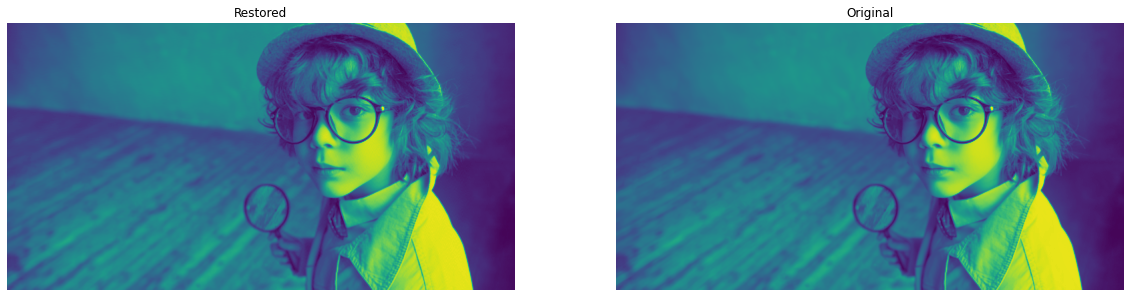

In [158]:
fig = plt.figure(figsize=(20, 12))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img)
plt.axis('off')
plt.title("Restored")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(X)
plt.axis('off')
plt.title("Original")


**Compression ratio / Sum of eigenvalues**

In [159]:
compression_ratio = (X.shape[0]*X.shape[1] - (X_reduced.shape[0]*X_reduced.shape[1] + eigenvector_subset.shape[0]*eigenvector_subset.shape[1])) / (X.shape[0]*X.shape[1]) 
print("Compression percentage: ", compression_ratio*100, sep="")
print("Sum of eigenvalues: ", eigen_values[:n_components].sum(), sep="")

Compression percentage: 42.76315789473684
Sum of eigenvalues: -6.019998606598314e-10


#**Encoding (200)**

In [160]:
n_components = 200 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [161]:
print (sorted_eigenvectors)

[[ 1.15693193e-02 -9.33076965e-04  1.10426919e-02 ...  0.00000000e+00
   0.00000000e+00 -2.09337745e-05]
 [ 1.18264012e-02 -1.57065700e-03  1.15915193e-02 ...  6.80112646e-02
   4.26785571e-02  4.66166062e-01]
 [ 1.19693606e-02 -2.07551469e-03  1.20717910e-02 ... -1.38567607e-01
  -1.57729723e-01 -2.09199853e-01]
 ...
 [-7.52499345e-03  6.26081670e-03 -2.55051680e-03 ... -4.93038748e-02
   3.08901565e-02 -3.60069892e-03]
 [-7.41903262e-03  6.26381406e-03 -2.48933213e-03 ...  1.90248012e-02
  -1.72958572e-02  4.37354958e-02]
 [-7.32314380e-03  6.14867315e-03 -2.31022896e-03 ... -1.72181161e-02
  -3.31677539e-02  2.77949116e-02]]


In [162]:
print (eigenvector_subset)

[[ 0.01156932 -0.00093308  0.01104269 ...  0.03215487 -0.02400854
  -0.0087733 ]
 [ 0.0118264  -0.00157066  0.01159152 ... -0.01507608 -0.04352232
  -0.01472565]
 [ 0.01196936 -0.00207551  0.01207179 ... -0.04465595 -0.0297562
  -0.00868284]
 ...
 [-0.00752499  0.00626082 -0.00255052 ... -0.01998889  0.01512271
   0.00279373]
 [-0.00741903  0.00626381 -0.00248933 ... -0.01671941  0.01479613
   0.0076219 ]
 [-0.00732314  0.00614867 -0.00231023 ...  0.00226807  0.00692757
  -0.01094052]]


In [163]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)

[[-1.55701479e+02 -2.54222032e+02  4.35939974e+02 ... -4.93973343e-01
  -3.61120317e+00  3.52649569e+00]
 [-1.22235137e+02 -1.65460761e+02  4.44704789e+02 ...  3.98871243e-02
   1.47093066e+00 -3.42089796e+00]
 [-9.42822593e+01 -8.48573330e+01  4.58881014e+02 ...  1.24412528e+00
   4.11072901e+00 -1.89265675e+00]
 ...
 [ 1.22074041e+03 -1.16452933e+01 -2.08100348e+02 ... -1.28470272e+00
  -7.69752478e-01  2.74066310e-01]
 [ 1.22198794e+03 -8.32598576e+00 -1.94774289e+02 ...  5.55181750e-01
  -1.28839101e-02  3.34237728e-02]
 [ 1.22263224e+03 -3.19235746e+00 -1.83301031e+02 ...  1.31818626e+00
  -8.07393288e-01  8.49906406e-01]]


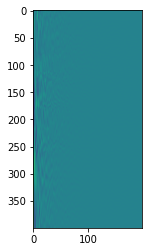

In [164]:
plt.imshow(X_reduced)

In [165]:
print(np.dot(np.linalg.inv(np.dot(eigenvector_subset.T, eigenvector_subset)),eigenvector_subset.T).shape)
print(X_reduced.shape)
print(X_meaned.shape)

(200, 760)
(400, 200)
(400, 760)


In [166]:
eigenvector_subset.T.shape

(200, 760)

**Restore The Image**

In [167]:
eigenvector_subset_inverse = np.dot(np.linalg.inv(np.dot(eigenvector_subset.T, eigenvector_subset)),eigenvector_subset.T)
#####################################################

img_meaned = np.dot(X_reduced, eigenvector_subset.T)

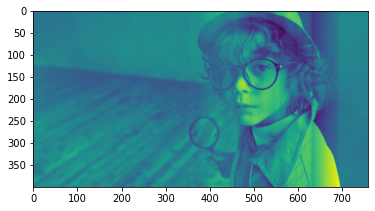

In [168]:
plt.imshow(img_meaned)

In [169]:
img = img_meaned + np.mean(X , axis = 0)


Text(0.5, 1.0, 'Original')

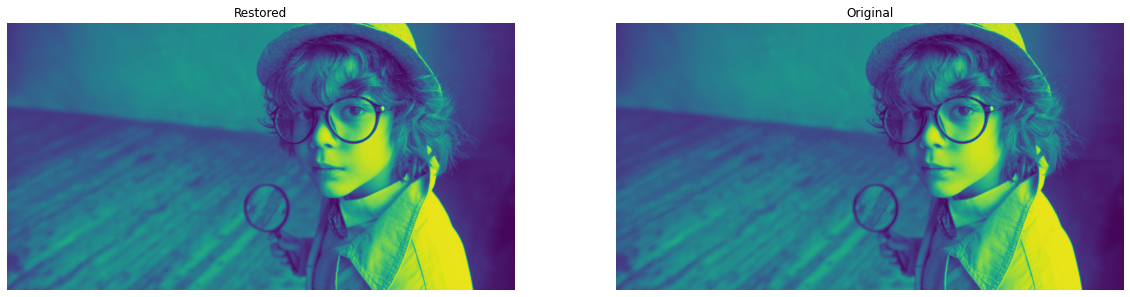

In [170]:
fig = plt.figure(figsize=(20, 15))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img)
plt.axis('off')
plt.title("Restored")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(X)
plt.axis('off')
plt.title("Original")


In [171]:
eigenvector_subset_inverse

array([[ 0.01156932,  0.0118264 ,  0.01196936, ..., -0.00752499,
        -0.00741903, -0.00732314],
       [-0.00093308, -0.00157066, -0.00207551, ...,  0.00626082,
         0.00626381,  0.00614867],
       [ 0.01104269,  0.01159152,  0.01207179, ..., -0.00255052,
        -0.00248933, -0.00231023],
       ...,
       [ 0.03215487, -0.01507608, -0.04465595, ..., -0.01998889,
        -0.01671941,  0.00226807],
       [-0.02400854, -0.04352232, -0.0297562 , ...,  0.01512271,
         0.01479613,  0.00692757],
       [-0.0087733 , -0.01472565, -0.00868284, ...,  0.00279373,
         0.0076219 , -0.01094052]])

In [172]:
eigenvector_subset.T

array([[ 0.01156932,  0.0118264 ,  0.01196936, ..., -0.00752499,
        -0.00741903, -0.00732314],
       [-0.00093308, -0.00157066, -0.00207551, ...,  0.00626082,
         0.00626381,  0.00614867],
       [ 0.01104269,  0.01159152,  0.01207179, ..., -0.00255052,
        -0.00248933, -0.00231023],
       ...,
       [ 0.03215487, -0.01507608, -0.04465595, ..., -0.01998889,
        -0.01671941,  0.00226807],
       [-0.02400854, -0.04352232, -0.0297562 , ...,  0.01512271,
         0.01479613,  0.00692757],
       [-0.0087733 , -0.01472565, -0.00868284, ...,  0.00279373,
         0.0076219 , -0.01094052]])

**Compression ratio / Sum of eigenvalues**

In [173]:
compression_ratio = (X.shape[0]*X.shape[1] - (X_reduced.shape[0]*X_reduced.shape[1] + eigenvector_subset.shape[0]*eigenvector_subset.shape[1])) / (X.shape[0]*X.shape[1]) 
print("Compression percentage: ", compression_ratio*100, sep="")
print("Sum of eigenvalues: ", eigen_values[:n_components].sum(), sep="")

Compression percentage: 23.684210526315788
Sum of eigenvalues: -6.125612533497622e-10
